# 8 图像频域滤波

根据卷积定理, 在原图上用卷积等价于在频域上相乘. 所以原图上的卷积核可以等价到频域上的相乘的核.

$$\widehat{F*G} = \hat F \odot \hat G$$

## 低通滤波器

在频域上保留低频的 (接近原点的), 滤掉高频的 (远离原点的). 例如在频域上将图像乘上如下的高斯滤波器:
$$e^{-\frac{|z|^2}{2\sigma^2}}=e^{-\frac{x^2+y^2}{2\sigma^2}}$$

则远离原点的部分会变得极小, 即高频部分被滤掉.

高斯滤波器因为是高斯卷积核的傅里叶变换, 所以有平滑的作用.

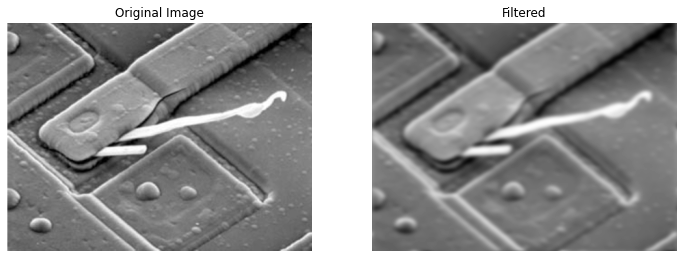

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\gadget.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

coor = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
coor = (coor[0] - coor[0].mean(), coor[1] - coor[1].mean())
gauss_filter = np.exp(-(coor[0]**2+coor[1]**2) / 1000)

img_filtered = img_fft * gauss_filter

img_filtered = np.fft.ifft2(np.fft.ifftshift(img_filtered)).real

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered')
plt.axis('off')
plt.show()

## 高通滤波器

在频域上保留高频的 (远离原点的), 滤掉低频的 (接近原点的). 可以用 ${\rm 高通滤波器} =  1 - {\rm 低通滤波器}$ 得到.

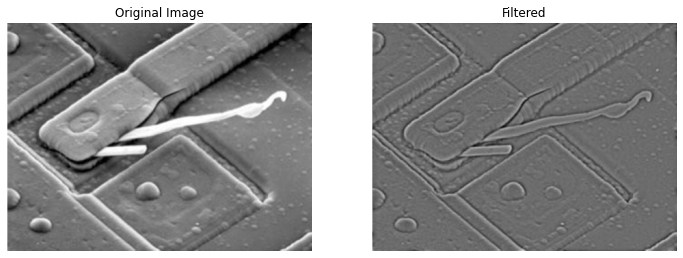

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os
img = np.array(Image.open(os.path.join(os.getcwd(), 'pics\\gadget.png')).convert('L'))
img_fft = np.fft.fftshift(np.fft.fft2(img))

coor = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
coor = (coor[0] - coor[0].mean(), coor[1] - coor[1].mean())
gauss_filter = 1. - np.exp(-(coor[0]**2+coor[1]**2) / 1000)

img_filtered = img_fft * gauss_filter

img_filtered = np.fft.ifft2(np.fft.ifftshift(img_filtered)).real

plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_filtered, cmap = 'gray')
plt.title('Filtered')
plt.axis('off')
plt.show()

## 锐化滤波器

## 选择滤波器

